# Simulation of the Kuramoto Model

In [ ]:
# Importing the required libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#OOP Code for the Kuramoto Model and the Three output plots

class KuramotoModel:
    def __init__(self, K_values_time, K_values, N, time, dt):
        """Setting up the Paramters for the Kuramoto Model"""
        self.K_values_time = K_values_time  # Coupling strengths for r vs. time
        self.K_values = K_values            # Coupling strengths for r vs. K (Kc curve)
        self.N = N                          # Number of oscillators
        self.time = time                    # Total simulation time
        self.dt = dt                        # Time step
        self.t_span = np.arange(0, time, dt)

        # Initialize omega (natural frequencies) and theta (initial phases)
        np.random.seed(35)  # Set a seed for reproducibility

        self.omega = np.random.normal(0, 1, N)  # Natural frequencies
        self.theta0 = 2 * np.pi * np.random.rand(N)  # Initial phase angles

    def kuramoto_equation(self, theta, t, omega, K):
        """Calculating dtheta/dt for each oscillator."""
        dtheta_dt = np.zeros(self.N)
        for i in range(self.N):
            interaction_sum = np.sum(np.sin(theta - theta[i]))
            dtheta_dt[i] = omega[i] + (K / self.N) * interaction_sum
        return dtheta_dt

    def compute_order_parameter(self, theta):
        """Calculating the order parameter r."""
        total_sum = sum([(np.exp(1j * i)) for i in theta])
        return abs(total_sum / self.N)

    def solve_r_vs_time(self):
        """r over time for each K in K_values_time."""
        r_values_time = {K: [] for K in self.K_values_time}
        for K in self.K_values_time:
            theta_t = odeint(self.kuramoto_equation, self.theta0, self.t_span, args=(self.omega, K))
            r_values_time[K] = [self.compute_order_parameter(theta) for theta in theta_t]
        return r_values_time

    def plot_r_vs_time(self):
        """r vs. time for different K values (a range of K values, for better visualization)."""
        r_values_time = self.solve_r_vs_time()
        plt.figure(figsize=(12, 6))
        for K, r_values in r_values_time.items():
            plt.plot(self.t_span, r_values, label=f'K = {K}')
        plt.xlabel('Time')
        plt.ylabel('Order Parameter (r)')
        plt.title('Order Parameter r vs. Time for Different K Values')
        plt.legend(loc="upper left")
        plt.grid()
        plt.show()

    def solve_r_vs_K(self):
        """Calculate average r over time for each K in K_values."""
        r_values_K = []
        for K in self.K_values:
            theta_t = odeint(self.kuramoto_equation, self.theta0, self.t_span, args=(self.omega, K))
            r_t = [self.compute_order_parameter(theta) for theta in theta_t]
            r_values_K.append(np.mean(r_t))  # Average r over time
        return r_values_K

    def plot_r_vs_K(self):
        """Plot r vs. K (Kc curve)."""
        r_values_K = self.solve_r_vs_K()
        plt.figure(figsize=(12, 4))
        plt.plot(self.K_values, r_values_K, marker='o')
        plt.xlabel('Coupling Strength (K)')
        plt.ylabel('Order Parameter (r)')
        plt.title('Order Parameter r vs. Coupling Strength K (Kc Curve)')
        plt.grid()
        plt.show()

    def plot_omega_distribution(self):
        """Plot the distribution of natural frequencies omega."""
        plt.hist(self.omega, bins=20, density=True, alpha=0.7, color='blue')
        sns.kdeplot(self.omega, color='red', label='KDE', linewidth=2)
        plt.xlabel('Natural Frequency (omega)')
        plt.ylabel('Density')
        plt.title('Distribution of Natural Frequencies (omega)')
        plt.legend(loc="upper right")
        plt.grid()
        plt.show()


Setting up the Parameters for the Model and it's Initialization

In [ ]:
# Parameters
K_values_time = [0.0, 0.5, 1.0 ,1.5, 2.5, 4, 5]  # For r vs. time plot
K_values = np.linspace(0, 6, 30)           # For r vs. K plot
N = 100                                    # Number of oscillators
T = 10                                     # Total time to simulate
dt = 0.1                                    # Time step

# Model initiating
model = KuramotoModel(K_values_time, K_values, N, T, dt)

r v/s K values Plot

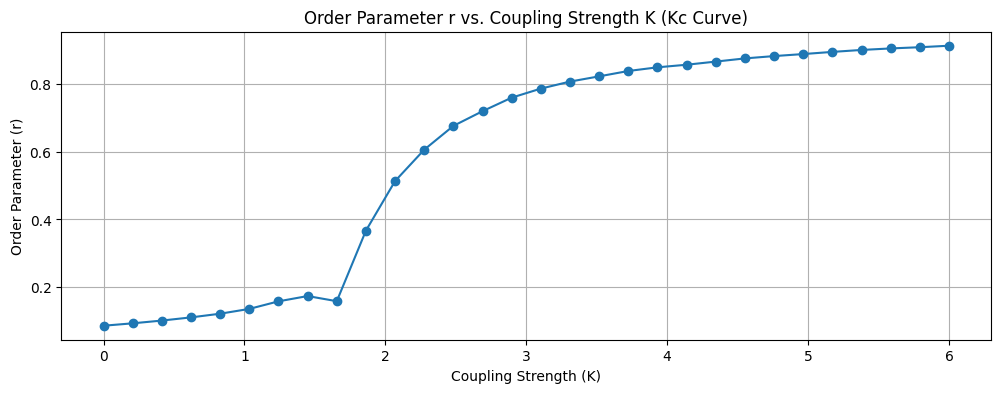

' At a certain point on x-axis (Kc) there will be a sudden increase in the slope of the graph. '

In [ ]:
model.plot_r_vs_K()         # Plot r vs. K (Kc curve)

""" At a certain point on x-axis (Kc) there will be a sudden increase in the slope of the graph. """

r(t) v/s Time plot

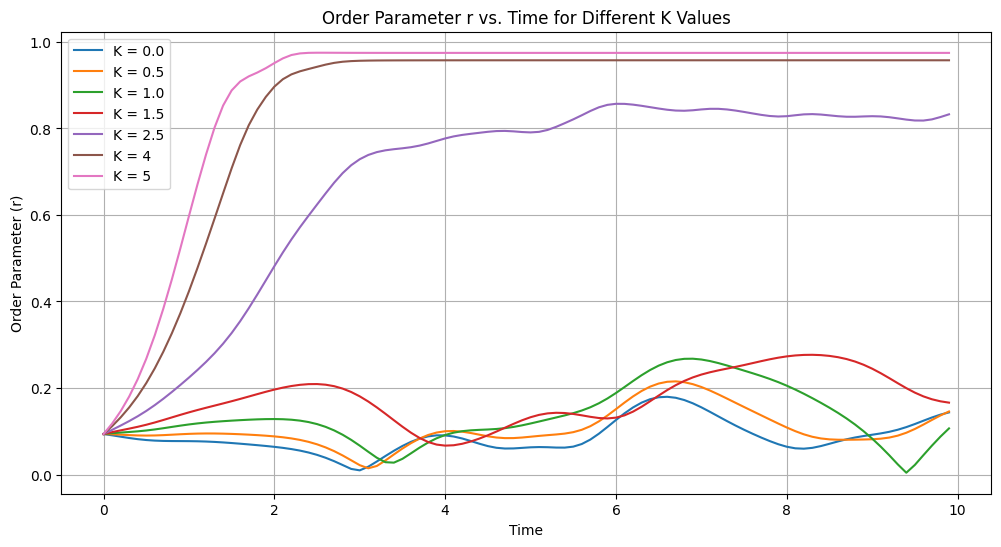

' For K > Kc, the r(t) shows a increase with time, whereas for K < Kc r(t) will remain closer to 0.'

In [ ]:
model.plot_r_vs_time()

""" For K > Kc, the r(t) shows a increase with time, whereas for K < Kc r(t) will remain closer to 0."""

Distribution of omega (w) of oscillators

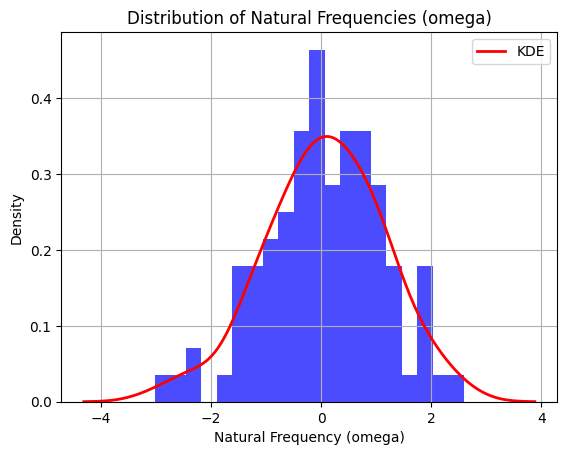

' For this simulation, I have assumed it to be a Standard Gaussian Distribution '

In [ ]:
model.plot_omega_distribution()

""" The graph shows the histogram and kde plot of the distribution of natural frequencies. """
""" For this simulation, I have assumed it to be a Standard Gaussian Distribution """